In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
pd.read_csv("covid-19.csv")
ds=pd.read_csv("covid-19.csv")

In [ ]:
ds.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [ ]:
ds.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [ ]:
ds.shape

(187, 15)

In [ ]:
ds.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
ds.duplicated().sum()

np.int64(0)

In [ ]:
ds.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [ ]:
ds.rename(columns={"Deaths / 100 Cases":"Death rate"},inplace=True)
ds.rename(columns={"Recovered / 100 Cases":"Recovery rate"},inplace=True)
ds.rename(columns={"Deaths / 100 Recovered":"Death vs Recovery rate"},inplace=True)


In [ ]:
Top10_countries_death_rate=ds.sort_values(by="Death rate",ascending=False).head(10)
print(Top10_countries_death_rate[["Country/Region", "Death rate"]])

     Country/Region  Death rate
184           Yemen       28.56
177  United Kingdom       15.19
16          Belgium       14.79
85            Italy       14.26
61           France       13.71
77          Hungary       13.40
120     Netherlands       11.53
111          Mexico       11.13
157           Spain       10.44
183  Western Sahara       10.00


In [ ]:
colors=plt.cm.tab10(np.arange(17))

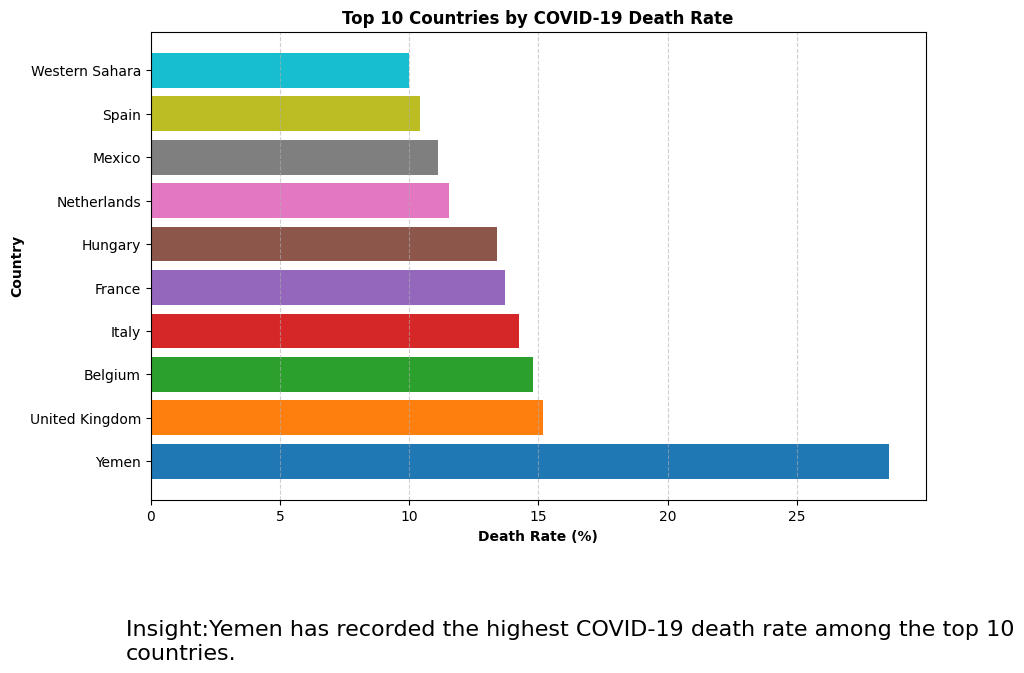

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(Top10_countries_death_rate["Country/Region"],Top10_countries_death_rate["Death rate"],color=colors)
plt.title("Top 10 Countries by COVID-19 Death Rate",fontweight='bold')
plt.xlabel("Death Rate (%)",fontweight='bold')
plt.ylabel("Country",fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.subplots_adjust(bottom=0.1)
plt.figtext(0.1, -0.1, "Insight:Yemen has recorded the highest COVID-19 death rate among the top 10 countries.",wrap=True, fontsize=16, ha='left', va='top')
plt.show()

In [ ]:
top5_countries_recoveryrates=ds.sort_values(by="Recovered",ascending=False).head(5)
print(top5_countries_recoveryrates[["Country/Region","Recovered"]])

    Country/Region  Recovered
23          Brazil    1846641
173             US    1325804
79           India     951166
138         Russia     602249
35           Chile     319954


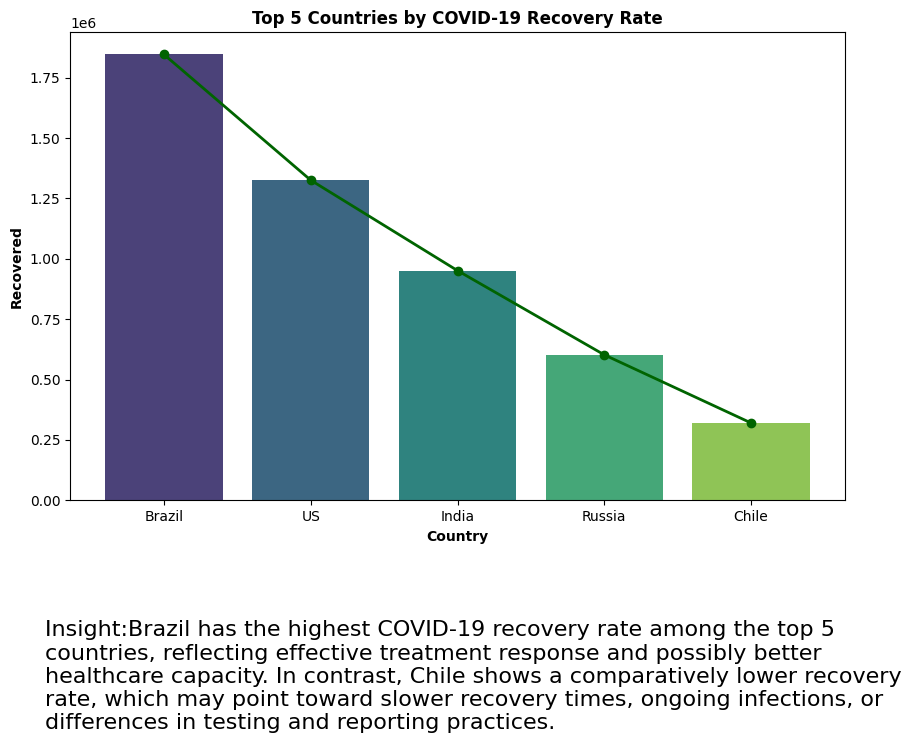

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Country/Region",y="Recovered",hue="Country/Region",data=top5_countries_recoveryrates,palette="viridis")
plt.plot(top5_countries_recoveryrates["Country/Region"],top5_countries_recoveryrates["Recovered"],color="darkgreen",marker="o",linewidth=2,label="Trend")
plt.title("Top 5 Countries by COVID-19 Recovery Rate",fontweight='bold')
plt.xlabel("Country",fontweight='bold')
plt.ylabel("Recovered",fontweight='bold')
plt.subplots_adjust(bottom=0.1)
plt.figtext(0.1, -0.1, "Insight:Brazil has the highest COVID-19 recovery rate among the top 5 countries, reflecting effective treatment response and possibly better healthcare capacity. In contrast, Chile shows a comparatively lower recovery rate, which may point toward slower recovery times, ongoing infections, or differences in testing and reporting practices.",wrap=True, fontsize=16, ha='left', va='top')
plt.show()



In [ ]:
ds.columns


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Death rate',
       'Recovery rate', 'Death vs Recovery rate', 'Confirmed last week',
       '1 week change', '1 week % increase', 'WHO Region'],
      dtype='object')

In [ ]:
Top_region  =ds.groupby("WHO Region")[["Confirmed","Deaths","Recovered"]].sum().sort_values(by="Confirmed", ascending=False).head()
print(Top_region)

                       Confirmed  Deaths  Recovered
WHO Region                                         
Americas                 8839286  342732    4468616
Europe                   3299523  211144    1993723
South-East Asia          1835297   41349    1156933
Eastern Mediterranean    1490744   38339    1201400
Africa                    723207   12223     440645


In [ ]:
Highest_Deaths_region=ds.groupby("WHO Region")["Deaths"].sum().sort_values(ascending=False).head()
print(Highest_Deaths_region)

WHO Region
Americas                 342732
Europe                   211144
South-East Asia           41349
Eastern Mediterranean     38339
Africa                    12223
Name: Deaths, dtype: int64


/tmp/ipython-input-3027436343.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




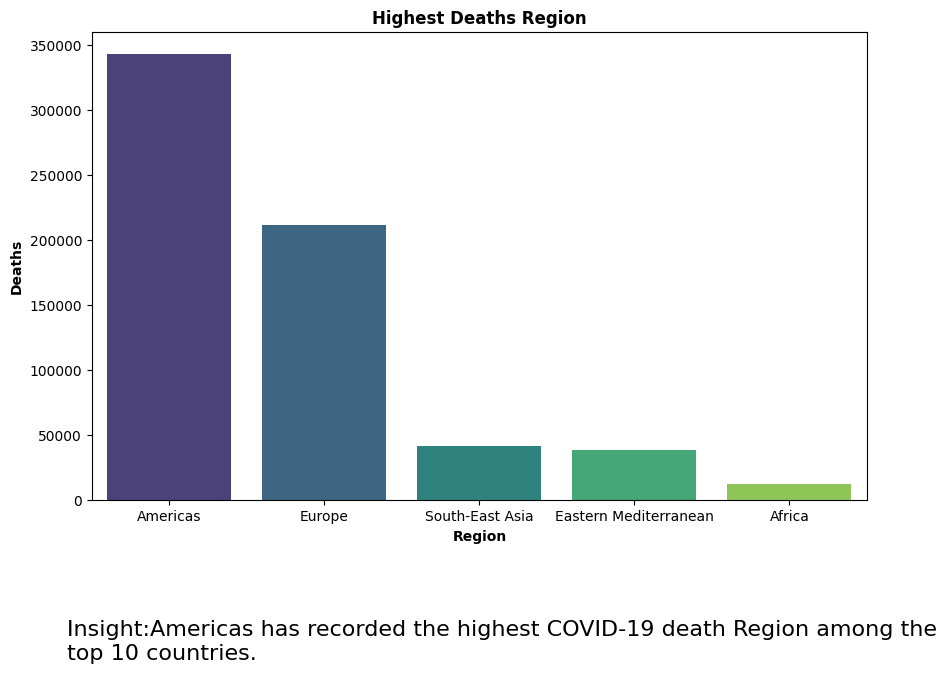

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=Highest_Deaths_region.index,y=Highest_Deaths_region.values,palette="viridis")
plt.title("Highest Deaths Region",fontweight='bold')
plt.xlabel("Region",fontweight='bold')
plt.ylabel("Deaths",fontweight='bold')
plt.subplots_adjust(bottom=0.1)
plt.figtext(0.1, -0.1, "Insight:Americas has recorded the highest COVID-19 death Region among the top 10 countries.",wrap=True, fontsize=16, ha='left', va='top')
plt.show()

In [ ]:
ds.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Death rate',
       'Recovery rate', 'Death vs Recovery rate', 'Confirmed last week',
       '1 week change', '1 week % increase', 'WHO Region'],
      dtype='object')

In [ ]:
highest_active=ds.loc[ds['Active'].idxmax()]
print("country with the highest number of active cases:")
print(f"Country/Region: {highest_active['Country/Region']}")
print(f"Active Cases: {highest_active['Active']:,}")
print(highest_active)

country with the highest number of active cases:
Country/Region: US
Active Cases: 2,816,444
Country/Region                  US
Confirmed                  4290259
Deaths                      148011
Recovered                  1325804
Active                     2816444
New cases                    56336
New deaths                    1076
New recovered                27941
Death rate                    3.45
Recovery rate                 30.9
Death vs Recovery rate       11.16
Confirmed last week        3834677
1 week change               455582
1 week % increase            11.88
WHO Region                Americas
Name: 173, dtype: object


In [ ]:
ds['1 week % increase']

,1 week % increase
0,2.07
1,17.00
2,18.07
3,2.60
4,26.84
...,...
182,19.12
183,0.00
184,4.45
185,36.86


In [ ]:
ds['1 week % increase'] = ((ds['Confirmed'] - ds['Confirmed last week']) / ds['Confirmed last week']) * 100
ds['1 week % increase'] = ds['1 week % increase'].round(2)

In [ ]:
top_5 = ds.sort_values('1 week % increase', ascending=False).head(5)
print(top_5[['Country/Region', '1 week % increase']])

       Country/Region  1 week % increase
130  Papua New Guinea             226.32
63             Gambia             191.07
11            Bahamas             119.54
186          Zimbabwe              57.85
99              Libya              42.78


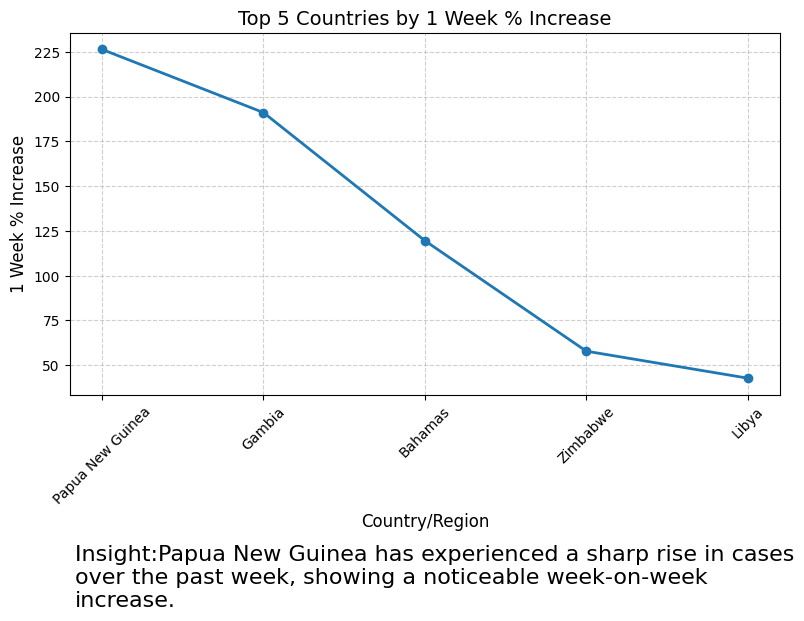

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(top_5['Country/Region'], top_5['1 week % increase'], marker='o', linestyle='-', linewidth=2)
plt.title('Top 5 Countries by 1 Week % Increase', fontsize=14)
plt.xlabel('Country/Region', fontsize=12)
plt.ylabel('1 Week % Increase', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.1, -0.1, "Insight:Papua New Guinea has experienced a sharp rise in cases over the past week, showing a noticeable week-on-week increase.",wrap=True, fontsize=16, ha='left', va='top')
plt.show()

In [ ]:
active_regions = ds[ds['Active'] > 0]
print(active_regions[['Country/Region', 'Active']])
top_active = active_regions.sort_values('Active', ascending=False).head(5)



         Country/Region  Active
0           Afghanistan    9796
1               Albania    1991
2               Algeria    7973
3               Andorra      52
4                Angola     667
..                  ...     ...
182  West Bank and Gaza    6791
183      Western Sahara       1
184               Yemen     375
185              Zambia    1597
186            Zimbabwe    2126

[182 rows x 2 columns]


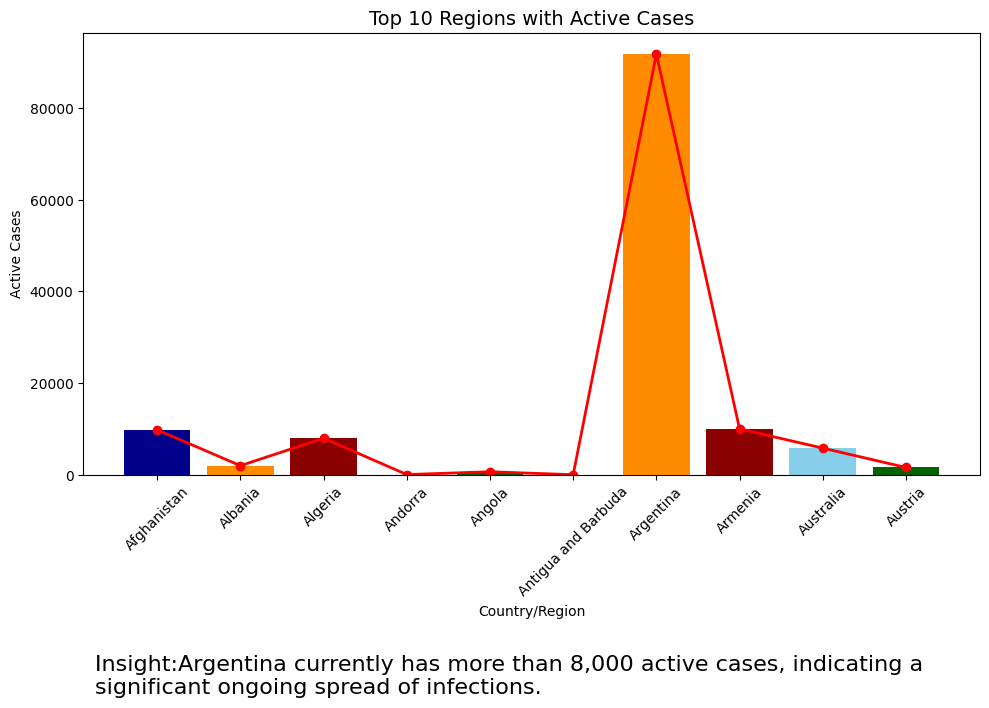

In [ ]:
top_active = active_regions.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_active['Country/Region'], top_active['Active'],color=['darkblue','darkorange','darkred','skyblue','darkgreen'])
plt.plot(top_active['Country/Region'], top_active['Active'],color='red',marker='o', linewidth=2, label='Trend')
plt.title('Top 10 Regions with Active Cases', fontsize=14)
plt.xlabel('Country/Region')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.1, -0.1, "Insight:Argentina currently has more than 8,000 active cases, indicating a significant ongoing spread of infections.",wrap=True, fontsize=16, ha='left', va='top')
plt.show()

# **Conslusion**

Overall, the COVID-19 data reveals significant variations in infection trends, recovery efficiency, and mortality rates across countries.

🇧🇷 Brazil demonstrates the highest recovery rate among the top 5 countries, suggesting stronger healthcare response and effective patient management.

🇨🇱 Chile, however, shows a comparatively lower recovery rate, which may indicate slower recovery or differences in reporting.

🇾🇪 Yemen stands out with the highest death rate among the top 10 countries, reflecting critical healthcare challenges and limited medical infrastructure.

🇵🇬 Papua New Guinea has experienced a notable weekly increase in cases, pointing to potential new outbreaks or rising community transmission.

🇦🇷 Argentina continues to report over 8,000 active cases, signaling ongoing infection spread that needs close monitoring.